In [1]:
import pandas as pd
import numpy as np


In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

In [3]:
chipo.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
chipo[['item_name', 'quantity']].groupby(['item_name']).sum().sort_values(['quantity'], ascending=False).head(5)

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [5]:
chipo[['item_name']].value_counts().count()

50

In [6]:
chipo['item_price'] = chipo.item_price.apply(lambda v: float(v[1:]))

In [7]:
chipo['price_per_item'] = chipo['item_price'] / chipo['quantity']

In [8]:
chipo.query('price_per_item > 10').item_name.unique().shape

(25,)

In [9]:
chipo[['item_name', 'price_per_item']].drop_duplicates().groupby(by=['item_name']).mean().head(5)

,price_per_item
item_name,
6 Pack Soft Drink,6.490000
Barbacoa Bowl,10.275000
Barbacoa Burrito,10.206667
Barbacoa Crispy Tacos,10.367500
Barbacoa Salad Bowl,10.640000


In [10]:
csv_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv'
df = pd.read_csv(csv_url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df.loc[:, "school":"guardian"].head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


In [12]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [13]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

data3


,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [14]:
pd.concat([data1, data2])

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [15]:
pd.concat([data1, data3.loc[0:data1.shape[0]-1, :]], axis=1)

,subject_id,first_name,last_name,subject_id,test_id
0,1,Alex,Anderson,1,51
1,2,Amy,Ackerman,2,15
2,3,Allen,Ali,3,15
3,4,Alice,Aoni,4,61
4,5,Ayoung,Atiches,5,16


In [16]:
pd.merge(data1, data2, on=['subject_id'])

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [17]:
pd.Series([3, 4, 5])

0    3
1    4
2    5
dtype: int64

In [18]:
pd.DataFrame([[1,2,3],[4,5,6]])

,0,1,2
0,1,2,3
1,4,5,6


In [19]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [20]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()


0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [21]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [22]:
apple.sort_index(ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [23]:
apple.resample('BM').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


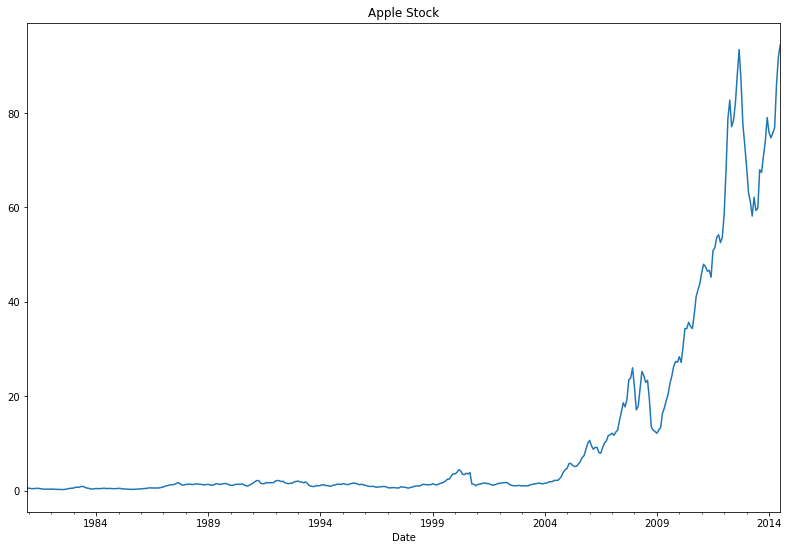

In [24]:
appl_open = apple.resample('BM').mean()['Adj Close'].plot(title = "Apple Stock")

fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

In [25]:
import matplotlib.pyplot as plt

# set this so the 
%matplotlib inline

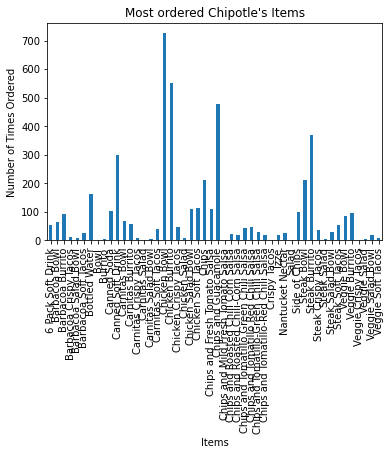

In [26]:
dfc = chipo.groupby(['item_name']).size()
dfc.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')
plt.show()

In [27]:
import pandas as pd
from datetime import date

employees = pd.DataFrame([
    [1, 'Finance', date(2022, 1, 1), date(2022, 1, 28)],
    [2, 'Marketing', date(2022, 1, 15), date(2022, 1, 29)],
    [3, 'Technology', date(2022, 1, 17), date(2022, 1, 18)],
    [4, 'Marketing', date(2022, 1, 1), date(2022, 1, 8)],
    [5, 'Technology', date(2022, 1, 15), date(2022, 1, 19)],
    [1, 'Finance', date(2022, 1, 1), date(2022, 1, 28)]
    ],
    columns=['Employee_id', 'Department', 'start_date', 'end_date']).drop_duplicates()

In [50]:
days = pd.concat([pd.DataFrame({'day_of_work': pd.date_range(row.start_date, row.end_date),
               'employee_id': row.Employee_id,
               'department': row.Department}) 
           for _, row in employees.iterrows()], ignore_index=True)

In [48]:
at_work = days[['day_of_work', 'employee_id']].groupby(['day_of_work']).count().rename({'employee_id': 'present_employees'}, axis=1)
january = pd.date_range(start=date(2022, 1, 1), end=date(2022, 1, 31))
at_work.reindex(january, fill_value=0)

,present_employees
2022-01-01,2
2022-01-02,2
2022-01-03,2
2022-01-04,2
2022-01-05,2
2022-01-06,2
2022-01-07,2
2022-01-08,2
2022-01-09,1
2022-01-10,1


In [46]:
january = pd.DataFrame(pd.date_range(start=date(2022, 1, 1), end=date(2022, 1, 31)), columns=['day_of_work'])
fill_to_january = pd.merge(january, at_work, on=['day_of_work'], how='left')
fill_to_january.fillna(value={'present_employees': 0.0})

,day_of_work,present_employees
0,2022-01-01,2.0
1,2022-01-02,2.0
2,2022-01-03,2.0
3,2022-01-04,2.0
4,2022-01-05,2.0
5,2022-01-06,2.0
6,2022-01-07,2.0
7,2022-01-08,2.0
8,2022-01-09,1.0
9,2022-01-10,1.0


In [62]:
import random

test_df = pd.DataFrame({
    'name': random.choices(['Jack', 'Vicky', 'Yelena', 'Ben', 'Sally', 'Dale'], k=100),
    'age': np.random.randint(0, 100, size=100),
    'food': random.choices(['carot', 'apple', 'pear', 'tomato', 'broccoli'], k=100)
}).astype({'name': 'category', 'age': 'int8', 'food': 'category'})
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   name    100 non-null    category
 1   age     100 non-null    int8    
 2   food    100 non-null    category
dtypes: category(2), int8(1)
memory usage: 860.0 bytes


In [66]:
test_df['is_Yelena'] = False
test_df.loc[test_df.name == 'Yelena', 'is_Yelena'] = True
test_df.head()

,name,age,food,is_Yelena
0,Yelena,18,broccoli,True
1,Ben,77,carot,False
2,Dale,84,carot,False
3,Jack,98,pear,False
4,Dale,62,apple,False


In [67]:
test_df = test_df.drop(columns=['is_Yelena'])
test_df.head()

,name,age,food
0,Yelena,18,broccoli
1,Ben,77,carot
2,Dale,84,carot
3,Jack,98,pear
4,Dale,62,apple


In [71]:
man = 'Jack'
test_df.query('name == @man').head()

,name,age,food
3,Jack,98,pear
7,Jack,44,carot
9,Jack,43,carot
13,Jack,50,apple
28,Jack,85,tomato


In [72]:
test_df['isAdult'] = test_df.age >= 21
test_df.head()

,name,age,food,isAdult
0,Yelena,18,broccoli,False
1,Ben,77,carot,True
2,Dale,84,carot,True
3,Jack,98,pear,True
4,Dale,62,apple,True


<AxesSubplot:xlabel='name'>

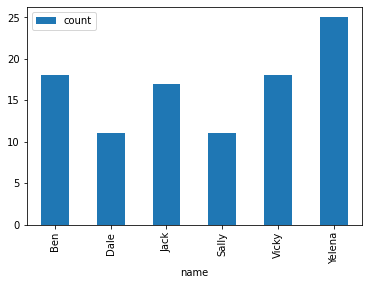

In [135]:
freq_df = test_df.groupby(['name'])['name'].count().to_frame(name='count').reset_index()
freq_df
freq_df.plot(kind='bar', x='name', y='count')

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

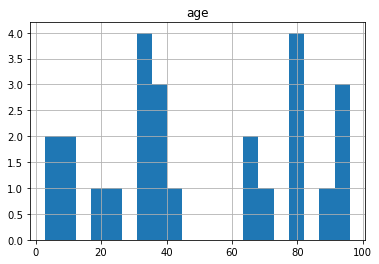

In [128]:
(test_df[['name', 'age']]
 .loc[test_df.name == 'Yelena']
 .hist(bins=20))

In [137]:
test_df['salary'] = pd.DataFrame(np.random.randint(0, 1000, size=100))
test_df

,name,age,food,isAdult,salary
0,Yelena,18,broccoli,False,917
1,Ben,77,carot,True,656
2,Dale,84,carot,True,349
3,Jack,98,pear,True,317
4,Dale,62,apple,True,997
...,...,...,...,...,...
95,Yelena,33,carot,True,723
96,Dale,20,pear,False,990
97,Sally,29,carot,True,233
98,Sally,28,tomato,True,486


In [140]:
test_df.groupby(['name'])['salary'].agg(['mean'])

,mean
name,
Ben,491.055556
Dale,676.181818
Jack,483.411765
Sally,511.909091
Vicky,464.111111
Yelena,510.280000


In [144]:
test_df.merge(test_df, on=['name'], suffixes=['_left', '_right']).head()

,name,age_left,food_left,isAdult_left,salary_left,age_right,food_right,isAdult_right,salary_right
0,Yelena,18,broccoli,False,917,18,broccoli,False,917
1,Yelena,18,broccoli,False,917,78,pear,True,545
2,Yelena,18,broccoli,False,917,9,apple,False,381
3,Yelena,18,broccoli,False,917,78,tomato,True,549
4,Yelena,18,broccoli,False,917,94,tomato,True,59


In [150]:
dup_df = pd.concat([test_df, test_df], axis=1)
dup_df.loc[:, ~dup_df.columns.duplicated()].copy().head()

,name,age,food,isAdult,salary
0,Yelena,18,broccoli,False,917
1,Ben,77,carot,True,656
2,Dale,84,carot,True,349
3,Jack,98,pear,True,317
4,Dale,62,apple,True,997
